In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
ROOT_DIR = './../home-credit-credit-risk-model-stability/'

In [2]:
# Utils to format the tables
def set_table_dtypes(df):
    # implement here all desired dtypes for tables
    # the following is just an example
    for col in df.columns:
        # last letter of column name will help you determine the type
        if col[-1] in ("P", "A"):
            df = df.with_columns(pl.col(col).cast(pl.Float64).alias(col))

    return df

def inspect_columns(df):
    df = pd.DataFrame(df)
    result = pd.DataFrame({
        'unique': df.nunique() == len(df),
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / len(df)) * 100, 2),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=len(df))],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes
    })
    return result

In [3]:
train_appl_prev_depth1 = pl.concat(
    [
        pl.read_csv(ROOT_DIR + "csv_files/train/train_applprev_1_0.csv").pipe(set_table_dtypes),
        pl.read_csv(ROOT_DIR + "csv_files/train/train_applprev_1_1.csv").pipe(set_table_dtypes),
    ],
    how="vertical_relaxed",
)
train_appl_prev_depth1

case_id,actualdpd_943P,annuity_853A,approvaldate_319D,byoccupationinc_3656910L,cancelreason_3545846M,childnum_21L,creationdate_885D,credacc_actualbalance_314A,credacc_credlmt_575A,credacc_maxhisbal_375A,credacc_minhisbal_90A,credacc_status_367L,credacc_transactions_402L,credamount_590A,credtype_587L,currdebt_94A,dateactivated_425D,district_544M,downpmt_134A,dtlastpmt_581D,dtlastpmtallstes_3545839D,education_1138M,employedfrom_700D,familystate_726L,firstnonzeroinstldate_307D,inittransactioncode_279L,isbidproduct_390L,isdebitcard_527L,mainoccupationinc_437A,maxdpdtolerance_577P,num_group1,outstandingdebt_522A,pmtnum_8L,postype_4733339M,profession_152M,rejectreason_755M,rejectreasonclient_4145042M,revolvingaccount_394A,status_219L,tenor_203L
i64,f64,f64,str,f64,str,f64,str,f64,f64,f64,f64,str,f64,f64,str,f64,str,str,f64,str,str,str,str,str,str,str,bool,bool,f64,f64,i64,f64,f64,str,str,str,str,f64,str,f64
2,0.0,640.2,null,null,"""a55475b1""",0.0,"""2013-04-03""",null,0.0,null,null,null,null,10000.0,"""CAL""",null,null,"""P136_108_173""",0.0,null,null,"""P97_36_170""","""2010-02-15""","""SINGLE""","""2013-05-04""","""CASH""",false,null,8200.0,null,0,null,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",24.0
2,0.0,1682.4,null,null,"""a55475b1""",0.0,"""2013-04-03""",null,0.0,null,null,null,null,16000.0,"""CAL""",null,null,"""P136_108_173""",0.0,null,null,"""P97_36_170""","""2010-02-15""","""SINGLE""","""2013-05-04""","""CASH""",false,null,8200.0,null,1,null,12.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",12.0
3,0.0,6140.0,null,null,"""P94_109_143""",null,"""2019-01-07""",null,0.0,null,null,null,null,59999.8,"""CAL""",null,null,"""P131_33_167""",0.0,null,null,"""P97_36_170""","""2018-05-15""","""MARRIED""","""2019-02-07""","""CASH""",false,null,11000.0,null,0,null,12.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",12.0
4,0.0,2556.6,null,null,"""P24_27_36""",null,"""2019-01-08""",null,0.0,null,null,null,null,40000.0,"""CAL""",null,null,"""P194_82_174""",0.0,null,null,"""a55475b1""",null,null,"""2019-02-08""","""CASH""",false,null,16000.0,null,0,null,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""T""",24.0
5,0.0,null,null,null,"""P85_114_140""",null,"""2019-01-16""",null,null,null,null,null,null,null,null,null,null,"""P54_133_26""",null,null,null,"""a55475b1""",null,null,null,null,false,null,62000.0,null,0,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""T""",null
6,0.0,1773.8,null,null,"""P94_109_143""",null,"""2018-09-12""",null,0.0,null,null,null,null,15980.0,"""CAL""",null,null,"""P82_154_182""",0.0,null,null,"""a55475b1""",null,null,"""2018-10-12""","""CASH""",false,null,37000.0,null,0,null,11.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",11.0
6,0.0,4189.6,null,null,"""P94_109_143""",0.0,"""2017-12-28""",null,0.0,null,null,null,null,32000.0,"""CAL""",null,null,"""P82_154_182""",0.0,null,null,"""P97_36_170""","""2013-09-15""","""SINGLE""","""2018-01-28""","""CASH""",false,null,35000.0,null,1,null,11.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",11.0
6,0.0,1110.4,null,1.0,"""a55475b1""",0.0,"""2014-11-18""",null,0.0,null,null,null,null,17380.0,"""COL""",0.0,null,"""a55475b1""",0.0,null,null,"""P97_36_170""","""2012-09-15""","""SINGLE""","""2014-12-18""","""POS""",false,null,14000.0,null,2,0.0,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",24.0
10,0.0,10916.601,"""2019-01-11""",null,"""P73_130_169""",null,"""2019-01-11""",null,0.0,null,null,null,null,100000.0,"""CAL""",null,null,"""P38_65_49""",0.0,null,null,"""P17_36_170""",null,"""MARRIED""","""2019-02-11""","""CASH""",false,null,57000.0,null,0,null,12.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""T""",12.0


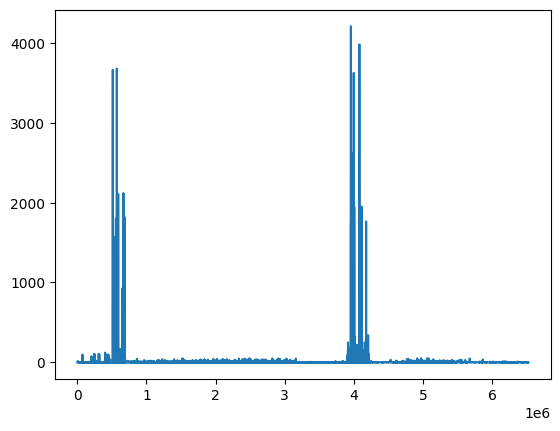

In [5]:
plt.plot(train_appl_prev_depth1['actualdpd_943P'])
plt.show()


In [ ]:
print(train_appl_prev_depth1['annuity_853A'].min())

In [1]:
!pip install polars
import pandas as pd
import polars as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


def plot_distribution(
    column,

    dataframe = df,
    bins='auto',
    histplot = True,
    kdeplot = False,
    scatterplot = False,
    scatter_plot_x = False,
    scatter_plot_y = False,

    is_categorical = False,
    countplot = True,
    pieplot = False,
    groupby = False,
    numeric_column_to_compare = False,
    categorical_column_to_compare = False,

    title=None,
    xlabel=None,
    ylabel=None,


    show_mean = False,
    show_median = False,
    show_mode = False,

    total_num = True,
    total_nan = True,
    count_zeros = True,
    total_non_nan_values = True,
    percentage_zeros = True,
    drop_invalid=True,
    describe=True
):
    """
    Plot the distribution of a column in a DataFrame.

    Parameters:
    - dataframe: pandas.DataFrame
    - column: str, the column name to plot
    - bins: int or 'auto', the number of bins for continuous data or 'auto' for automatic binning
    """

    # Check if the column exists in the DataFrame
    if column not in dataframe.columns:
        print(f"Error: Column '{column}' not found in the DataFrame.")
        return

    # Drop NaNs or empties if specified
    if drop_invalid:
        dataframe = dataframe.dropna(subset=[column])


    plt.figure(figsize=(10, 6))

    if is_categorical:
        if countplot:
            sns.countplot(x=dataframe[column], data=dataframe)
            plt.title(f'Distribution of {column} - Categorical')
            plt.ylabel('Frequency')
            plt.xlabel(column)
            plt.show()
        if pieplot:
            dataframe[column].value_counts().plot.pie(autopct='%1.1f%%')
            plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            plt.show()

        if groupby:
            if numeric_column_to_compare:
                dataframe.groupby(column)[numeric_column_to_compare].mean().plot(kind='bar')
                plt.show()
            elif categorical_column_to_compare:
                # Your existing code
                sns.countplot(x=categorical_column_to_compare, hue=column, data=dataframe)
                # Adding x and y labels
                plt.xlabel('Credit Account Actual Balance')  # Replace with the actual label for the x-axis
                plt.ylabel('Count')  # Replace with the actual label for the y-axis
                plt.show()

    else:
        mean = dataframe[column].mean()
        median = dataframe[column].median()
        mode_value = statistics.mode(dataframe[column])

        if histplot:
            sns.histplot(dataframe[column], bins=bins, kde=kdeplot)
            plt.title(title or f'Distribution of {column}')
            plt.xlabel(xlabel or f'{column} values')
            plt.ylabel(ylabel or 'Frequency')
            plt.ylim(0, 10000)
            plt.xlim(-110000, 110000)

            if show_mean: plt.axvline(mean, color='red', linestyle='dashed', label='Mean')
            if show_median: plt.axvline(median, color='green', linestyle='dashed', label='Median')
            if show_mode: plt.axvline(mode_value, color='blue', linestyle='dashed', label='Mode')
            plt.legend()
            plt.show()
        if kdeplot:
            sns.kdeplot(dataframe[column])
            plt.xlabel(xlabel or f'{column} values')
            plt.ylabel(ylabel or 'Frequency')
            plt.ylim(0, 10000)
            plt.xlim(-110000, 110000)
            if show_mean: plt.axvline(mean, color='red', linestyle='dashed', label='Mean')
            if show_median: plt.axvline(median, color='green', linestyle='dashed', label='Median')
            if show_mode: plt.axvline(mode_value, color='blue', linestyle='dashed', label='Mode')
            plt.legend()
            plt.show()

        if scatterplot:
            sns.set_palette("husl")
            sns.set_theme(style="whitegrid")
            scatter_plot = sns.scatterplot(x=scatter_plot_x, y=scatter_plot_y,  data=dataframe, palette="viridis", alpha=0.7)

            scatter_plot.set(
                xlabel=xlabel or f'{column} values',
                ylabel=ylabel or 'Frequency',
                title=title or f'Distribution of {column}'
            )
            scatter_plot.legend()
            scatter_plot.grid(True, linestyle='--', alpha=0.7)
            sns.regplot(x=scatter_plot_x, y=scatter_plot_y, data=dataframe, scatter=False, ax=scatter_plot)
            plt.show()

    nzeros = (dataframe[column] == 0).sum()
    ntotalnonnan= dataframe[column].notna().sum()
    if total_num and not describe: print('Total: ', dataframe[column].shape[0])
    if total_non_nan_values: print('Total non zero value: ', ntotalnonnan)
    if total_nan: print('Missed values num. ',  dataframe[column].isnull().sum())
    if count_zeros and not is_categorical: print('Count zeros: ', nzeros)
    if percentage_zeros: print("Zero %: ", np.round(nzeros / ntotalnonnan * 100, 2))
    if show_mean and not is_categorical and  not describe: print("Mean: ", dataframe[column].mean())
    if show_median and not is_categorical and not describe: print('Median: ', dataframe[column].median())
    if show_mode: print('Mode: ', dataframe[column].mode()[0])
    if describe: dataframe[column].describe()


SyntaxError: positional argument follows keyword argument (3886757156.py, line 112)

In [ ]:
plot_distribution(train_appl_prev_depth1, 'actualdpd_943P', histplot=True, kdeplot=True, scatterplot=False, is_categorical=False, countplot=False, pieplot=False, groupby=False, numeric_column_to_compare=False, categorical_column_to_compare=False, title='Distribution of actualdpd_943P', xlabel='actualdpd_943P values', ylabel='Frequency', show_mean=True, show_median=True, show_mode=True, total_num=True, total_nan=True, count_zeros=True, total_non_nan_values=True, percentage_zeros=True, drop_invalid=False, describe=False)